## Adding Libraries

In [1]:
import cv2
import numpy as np
import imageio as iio
from matplotlib import pyplot as plt

## Reading Images

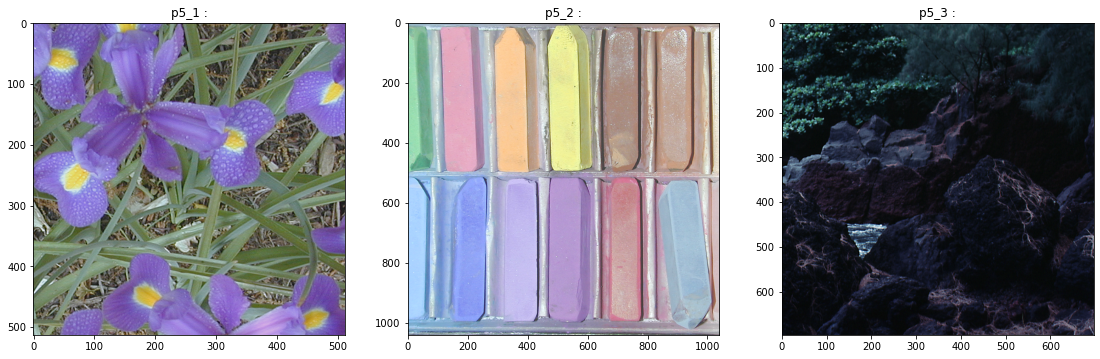

In [4]:
img1 = iio.imread("p5_1.tif")
img2 = iio.imread("p5_2.tif")
img3 = iio.imread("p5_3.tif")

plt.figure(figsize=(19,10))
plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title('p5_1 :')

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title('p5_2 :')

plt.subplot(1,3,3)
plt.imshow(img3,cmap='gray')
plt.title('p5_3 :');

## A) 
image 1

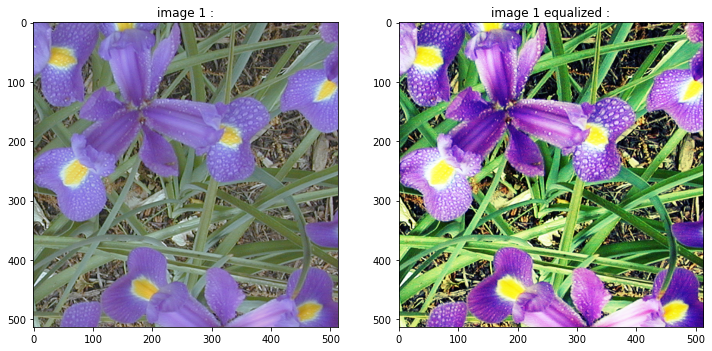

In [16]:
R1, G1, B1 = img1[:,:,0], img1[:,:,1], img1[:,:,2]
R1_eq = cv2.equalizeHist(R1)
G1_eq = cv2.equalizeHist(G1)
B1_eq = cv2.equalizeHist(B1)
img1_eq = np.dstack((R1_eq, G1_eq, B1_eq))

plt.figure(figsize=(12,10))
plt.subplot(121)
plt.imshow(img1)
plt.title('image 1 :')

plt.subplot(122)
plt.imshow(img1_eq)
plt.title('image 1 equalized :');

#### For this image the result is much brighter and depart form that the colors are more visible compered to the original image which is completely flat, in other words the saturation is enhanced noticeably, and the reason of all the changes is equalization in each color which makes the contrast of that spesific color higher and also because the image is darken at the first place the equalization in each channel is similar and no new colors are generated.

#### image 2

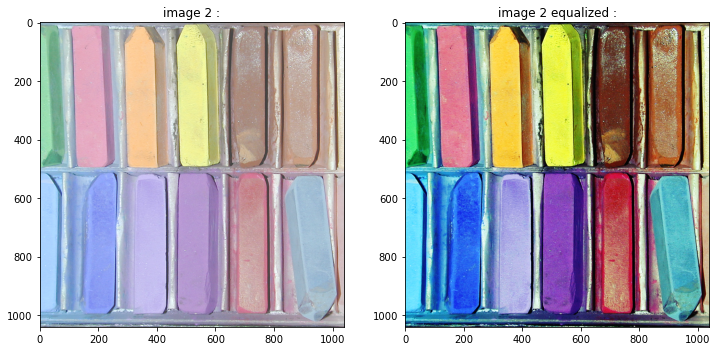

In [17]:
R2, G2, B2 = img2[:,:,0], img2[:,:,1], img2[:,:,2]
R2_eq = cv2.equalizeHist(R2)
G2_eq = cv2.equalizeHist(G2)
B2_eq = cv2.equalizeHist(B2)
img2_eq = np.dstack((R2_eq, G2_eq, B2_eq))

plt.figure(figsize=(12,10))
plt.subplot(121)
plt.imshow(img2)
plt.title('image 2 :')

plt.subplot(122)
plt.imshow(img2_eq)
plt.title('image 2 equalized :');

#### Here all the things that had happened for the first image happened and colors are more visible because histogram is streched and contrast is higher.

#### image 3

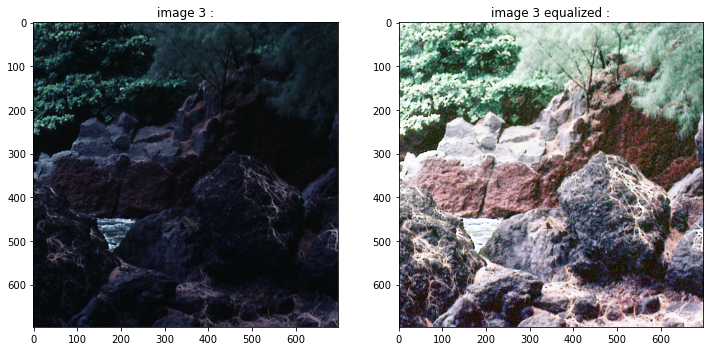

In [18]:
R3, G3, B3 = img3[:,:,0], img3[:,:,1], img3[:,:,2]
R3_eq = cv2.equalizeHist(R3)
G3_eq = cv2.equalizeHist(G3)
B3_eq = cv2.equalizeHist(B3)
img3_eq = np.dstack((R3_eq, G3_eq, B3_eq))

plt.figure(figsize=(12,10))
plt.subplot(121)
plt.imshow(img3)
plt.title('image 3 :')

plt.subplot(122)
plt.imshow(img3_eq)
plt.title('image 3 equalized :');

#### For this image because it is so dark first thing that you may notice is how it got so much brighter tanks to the shift that histogram equalization makes, but the colors might have been changed which is being test if so in the next part.

## B)

#### For avrage histogram equalization I stacked three channels and made histogram equalization on it which is equivalent of avraging HE functions of each channel.

(697, 697) (697, 2091)


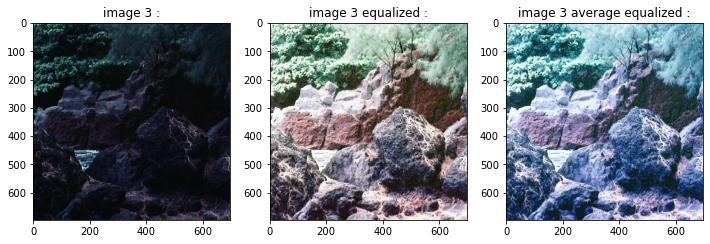

In [47]:
stacked_RGB = np.hstack((R3,G3,B3))
print(R3.shape, stacked_RGB.shape)

stacked_eq = cv2.equalizeHist(stacked_RGB)
avg_eq = np.dstack((stacked_eq[0:697,0:697],
                   stacked_eq[0:697,697:2*697],
                   stacked_eq[0:697,2*697:3*697]))

plt.figure(figsize=(12,10))
plt.subplot(131)
plt.imshow(img3)
plt.title('image 3 :')

plt.subplot(132)
plt.imshow(img3_eq)
plt.title('image 3 equalized :')

plt.subplot(133)
plt.imshow(avg_eq)
plt.title('image 3 average equalized :');

<h5>
    As it was expected the first equalization changes the color and if you see the original image the stones are cooler and the overall color of the image is blue wich isn't changed in the second part, on the other hand first method made the image warmer by equalizing the blue channel too much and completly destroyed the colors and made it like the image that had been taken in the day.
    
<br> In the end if you want your image look exactly as it should without change in the colors you should equalize all the RGB channels similarly or equalize it as an HSV image, and if you don’t care about the colors and your priority is WB(white Balence) then you might like to equalize each channel Independently.

## C)

#### YUV :

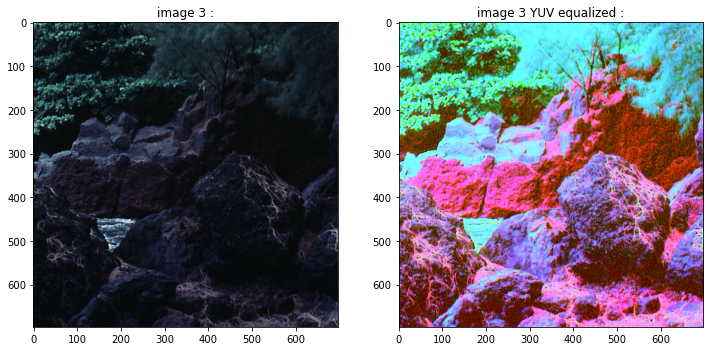

In [120]:
YUV = cv2.cvtColor(img3, cv2.COLOR_RGB2YUV)
Y, U, V = YUV[:,:,0], YUV[:,:,1], YUV[:,:,2]
Ymin, Umin, Vmin = np.min(Y),np.min(U),np.min(V)
Ymax, Umax, Vmax = np.max(Y),np.max(U),np.max(V)
#Y = ((Y-Ymin)*255/(Ymax-Ymin)).astype('uint8')
#U = ((U-Umin)*255/(Umax-Umin)).astype('uint8')
#V = ((V-Vmin)*255/(Vmax-Vmin)).astype('uint8')

Y_eq = cv2.equalizeHist(Y)
U_eq = cv2.equalizeHist(U)
V_eq = cv2.equalizeHist(V)

#Y_eq = ((Y_eq/255)*(Ymax-Ymin)+Ymin).astype('uint8')
#U_eq = ((U_eq/255)*(Umax-Umin)+Umin).astype('uint8')
#V_eq = ((V_eq/255)*(Vmax-Vmin)+Vmin).astype('uint8')

YUV_eq = np.dstack((Y_eq, U_eq, V_eq))
YUV_eq = cv2.cvtColor(YUV_eq, cv2.COLOR_YUV2RGB)

plt.figure(figsize=(12,10))
plt.subplot(121)
plt.imshow(img3)
plt.title('image 3 :')

plt.subplot(122)
plt.imshow(YUV_eq)
plt.title('image 3 YUV equalized :');

#### YIQ :

##### functions for RGB to YIQ and vice versa 

In [101]:
def RGB2YIQ(img):
    m, n ,c= img.shape
    Y = np.zeros((m, n))
    I = np.zeros((m, n))
    Q = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            R = img[i,j,0]
            G = img[i,j,1]
            B = img[i,j,2]
            
            Y[i,j] = int((0.299*R) + (0.587*G) + (0.114*B))
            I[i,j] = int((0.596*R) - (0.274*G) - (0.322*B))
            Q[i,j] = int((0.211*R) - (0.523*G) + (0.311*B))
    out = np.dstack((Y,I,Q))
    return out

def YIQ2RGB(img):
    m, n ,c= img.shape
    R = np.zeros((m, n))
    G = np.zeros((m, n))
    B = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            Y = img[i,j,0]
            I = img[i,j,1]
            Q = img[i,j,2]
            
            R[i, j] = int((1.000*Y) + (0.956*I) + (0.621*Q))
            G[i, j] = int((1.000*Y) - (0.272*I) - (0.647*Q))
            B[i, j] = int((1.000*Y) - (1.106*I) + (1.703*Q))
    R = (R-np.min(R))*255/(np.max(R)-np.min(R))
    G = (G-np.min(G))*255/(np.max(G)-np.min(G))
    B = (B-np.min(B))*255/(np.max(B)-np.min(B))
    out = np.dstack((R,G,B))
    return out.astype('uint8')

#### I normalized YIQ channels for HE and then denormalized them to the original interval and the result looks like the best Enhancement that I've ever seen in my life :)

0.0 -59.0 -36.0
255.0 37.0 20.0


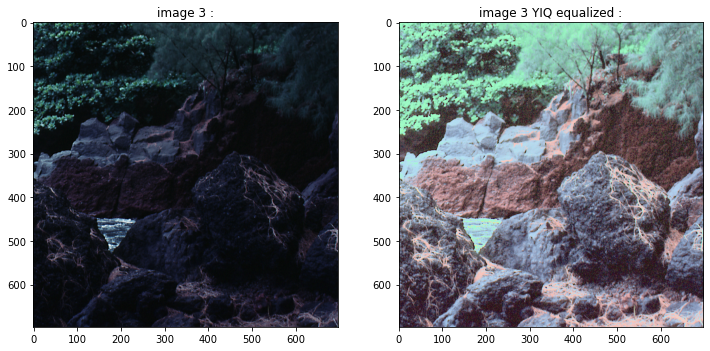

In [121]:
YIQ = RGB2YIQ(img3)
Y, I, Q= YIQ[:,:,0], YIQ[:,:,1], YIQ[:,:,2]
Ymin, Imin, Qmin = np.min(Y), np.min(I), np.min(Q)
Ymax, Imax, Qmax = np.max(Y), np.max(I), np.max(Q)
Y = ((Y-Ymin)*255/(Ymax-Ymin)).astype('uint8')
I = ((I-Imin)*255/(Imax-Imin)).astype('uint8')
Q = ((Q-Qmin)*255/(Qmax-Qmin)).astype('uint8')

Y_eq = cv2.equalizeHist(Y)
I_eq = cv2.equalizeHist(I)
Q_eq = cv2.equalizeHist(Q)

Y_eq = ((Y_eq/255)*(Ymax-Ymin)+Ymin).astype('double')
I_eq = ((I_eq/255)*(Imax-Imin)+Imin).astype('double')
Q_eq = ((Q_eq/255)*(Qmax-Qmin)+Qmin).astype('double')

YIQ_eq = np.dstack((Y_eq, I_eq, Q_eq))
YIQ_eq = YIQ2RGB(YIQ_eq)
print(np.min(YIQ[:,:,0]),np.min(YIQ[:,:,1]),np.min(YIQ[:,:,2]))
print(np.max(YIQ[:,:,0]),np.max(YIQ[:,:,1]),np.max(YIQ[:,:,2]))
plt.figure(figsize=(12,10))
plt.subplot(121)
plt.imshow(img3)
plt.title('image 3 :')

plt.subplot(122)
plt.imshow(YIQ_eq)
plt.title('image 3 YIQ equalized :');

#### YCbCr

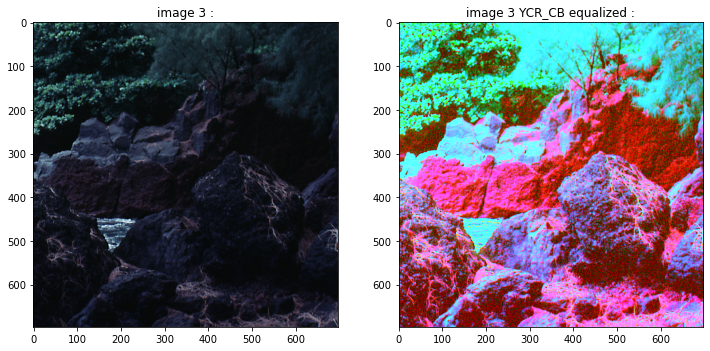

In [106]:
bCr = cv2.cvtColor(img3, cv2.COLOR_RGB2YCR_CB)
b, c, r = bCr[:,:,0], bCr[:,:,1], bCr[:,:,2]
b_eq = cv2.equalizeHist(b)
c_eq = cv2.equalizeHist(c)
r_eq = cv2.equalizeHist(r)
bcr_eq = np.dstack((b_eq, c_eq, r_eq))
bcr_eq = cv2.cvtColor(bcr_eq, cv2.COLOR_YCR_CB2RGB)

plt.figure(figsize=(12,10))
plt.subplot(121)
plt.imshow(img3)
plt.title('image 3 :')

plt.subplot(122)
plt.imshow(bcr_eq)
plt.title('image 3 YCR_CB equalized :');

### Comparison 

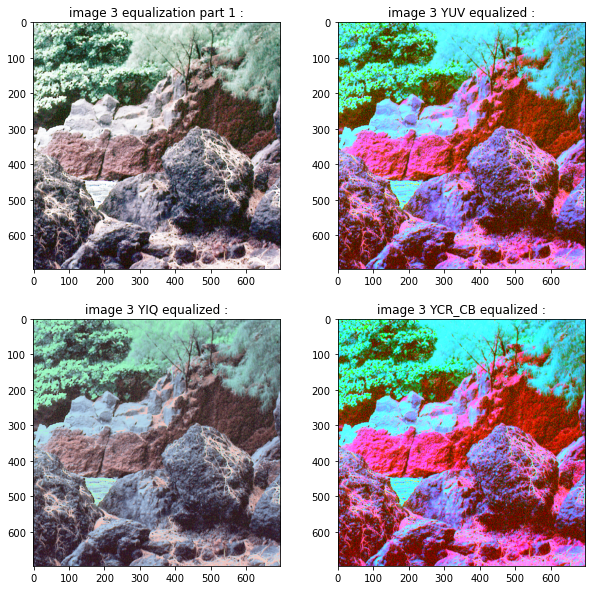

In [114]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img3_eq)
plt.title('image 3 equalization part 1 :')

plt.subplot(222)
plt.imshow(YUV_eq)
plt.title('image 3 YUV equalized :');

plt.subplot(223)
plt.imshow(YIQ_eq)
plt.title('image 3 YIQ equalized :');

plt.subplot(224)
plt.imshow(bcr_eq)
plt.title('image 3 YCR_CB equalized :');

#### part one is not that bad for this image but YIQ is really awesome and the other two looks alike and have a ton of pink and purplish colors which made them unnatural, in the end YIQ results is perfect with every metric, WB, brightness, contrast, and even temparature.